Dataset complete info: https://archive.ics.uci.edu/ml/datasets/car+evaluation

In [1]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [2]:
import pandas as pd
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [13]:
columns =["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class_value"]

In [14]:
df = pd.read_csv(car_data, names=columns)

In [15]:
df.dtypes

buying         object
maint          object
doors          object
persons        object
lug_boot       object
safety         object
Class_value    object
dtype: object

In [17]:
df

,buying,maint,doors,persons,lug_boot,safety,Class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [19]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class_value, Length: 1728, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maint        1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   Class_value  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


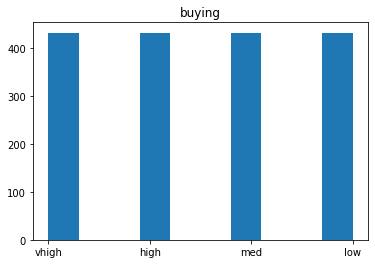

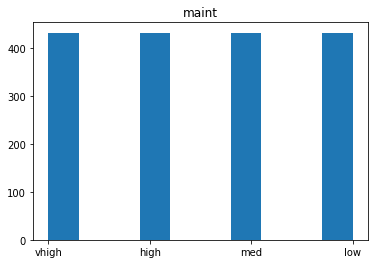

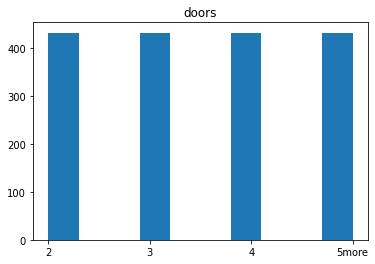

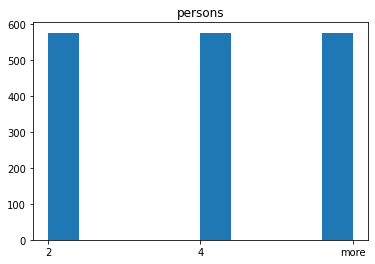

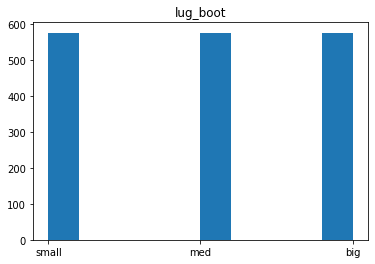

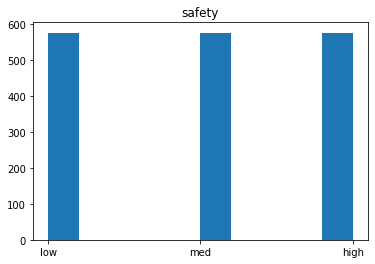

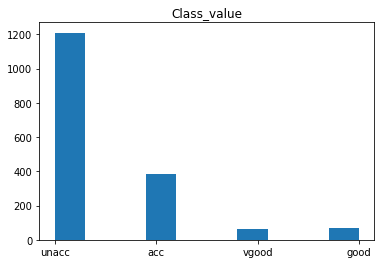

In [20]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [12]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [23]:
df["Class_value"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class_value, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)


In [43]:
X_test

array([[0., 0., 2., 0., 1., 0.],
       [2., 1., 0., 1., 1., 2.],
       [0., 0., 3., 0., 0., 2.],
       ...,
       [3., 2., 2., 1., 0., 0.],
       [1., 1., 0., 2., 2., 2.],
       [1., 1., 3., 1., 1., 2.]])

In [44]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(3025.027173913043, 2627.4, 'persons <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]\nclass = doors'),
 Text(2944.157608695652, 2446.2, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]\nclass = doors'),
 Text(3105.8967391304345, 2446.2, 'safety <= 0.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]\nclass = doors'),
 Text(1667.9347826086955, 2265.0, 'maint <= 2.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]\nclass = buying'),
 Text(909.7826086956521, 2083.8, 'buying <= 0.5\ngini = 0.613\nsamples = 202\nvalue = [114, 21, 26, 41]\nclass = buying'),
 Text(242.60869565217388, 1902.6, 'doors <= 0.5\ngini = 0.103\nsamples = 55\nvalue = [52, 0, 3, 0]\nclass = buying'),
 Text(161.7391304347826, 1721.4, 'lug_boot <= 1.5\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 3, 0]\nclass = buying'),
 Text(80.8695652173913, 1540.2, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]\nclass = buying'),
 Text(242.60869565217388, 1540.2, 'persons <= 1.5\ngini = 0.48\nsam

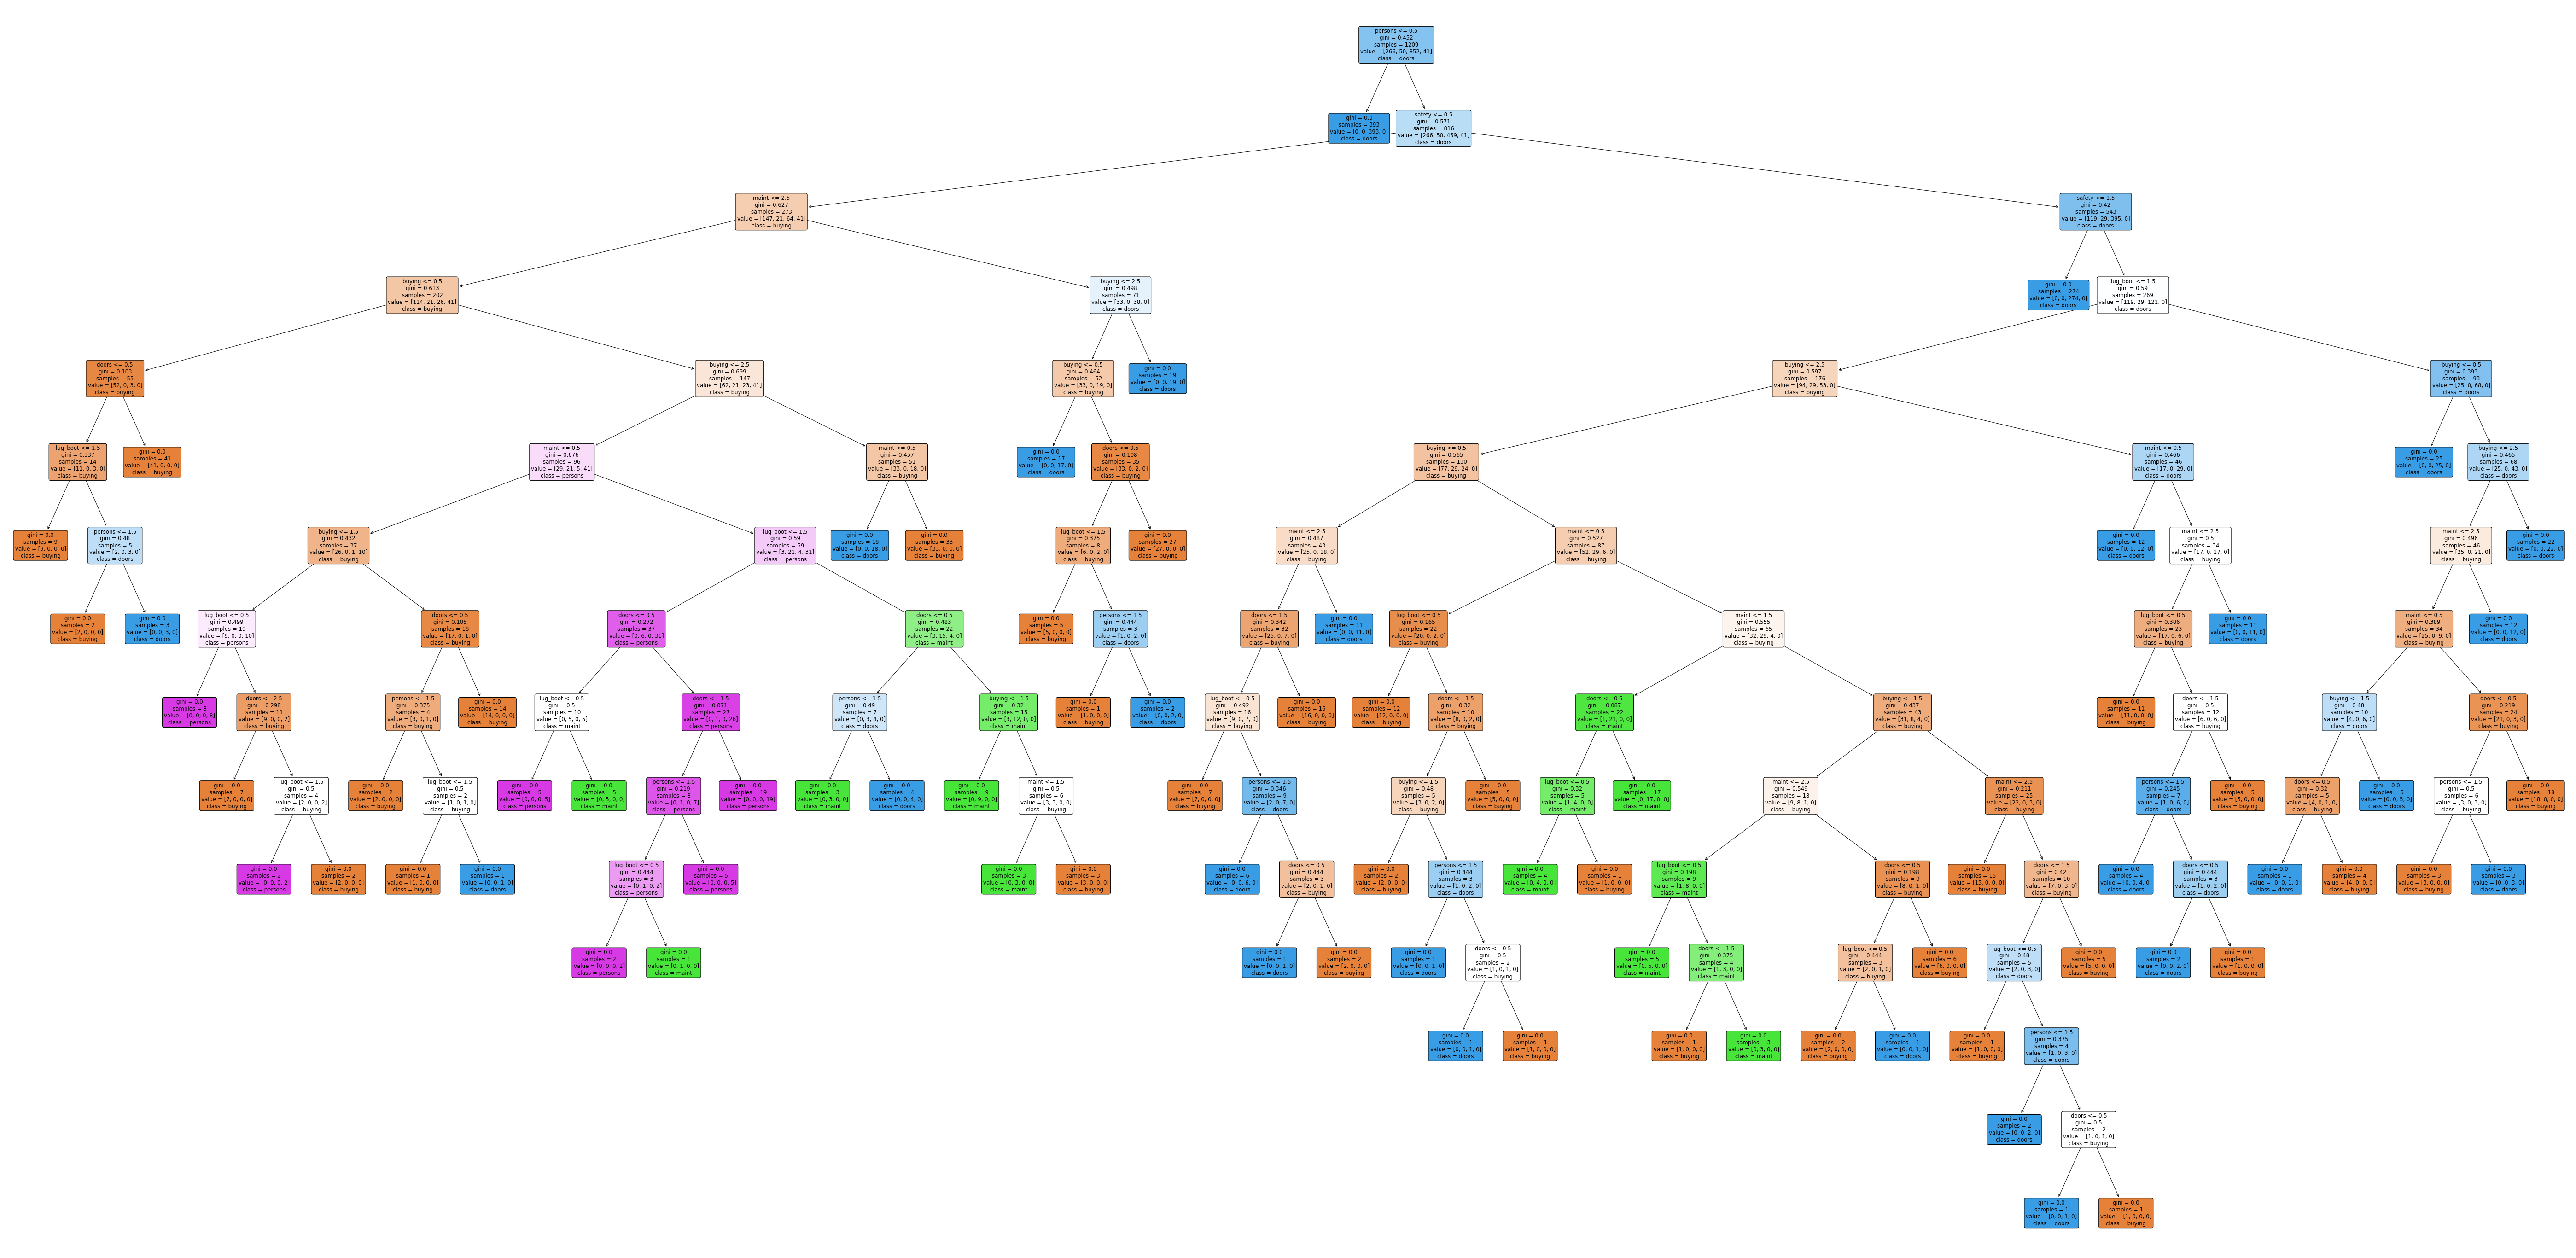

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 50))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=["buying", "maint", "doors", "persons", "lug_boot", "safety"],
         feature_names=X.columns)

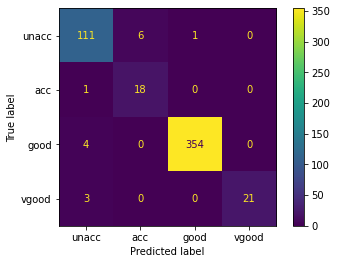

In [46]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [48]:

predictions = dt_clf.predict(X_test)

In [49]:
accuracy = (predictions==y_test).sum()/(len(y_test))
accuracy

0.9710982658959537

In [50]:
print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Test set score: 0.9711


In [51]:
from sklearn.metrics import accuracy_score

print('Accuracy score with criterion gini index: {0:0.4f}%'. format(accuracy_score(y_test,predictions)*100))

Accuracy score with criterion gini index: 97.1098%


[Text(3025.027173913043, 2627.4, 'persons <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]\nclass = doors'),
 Text(2944.157608695652, 2446.2, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]\nclass = doors'),
 Text(3105.8967391304345, 2446.2, 'safety <= 0.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]\nclass = doors'),
 Text(1667.9347826086955, 2265.0, 'maint <= 2.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]\nclass = buying'),
 Text(909.7826086956521, 2083.8, 'buying <= 0.5\ngini = 0.613\nsamples = 202\nvalue = [114, 21, 26, 41]\nclass = buying'),
 Text(242.60869565217388, 1902.6, 'doors <= 0.5\ngini = 0.103\nsamples = 55\nvalue = [52, 0, 3, 0]\nclass = buying'),
 Text(161.7391304347826, 1721.4, 'lug_boot <= 1.5\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 3, 0]\nclass = buying'),
 Text(80.8695652173913, 1540.2, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]\nclass = buying'),
 Text(242.60869565217388, 1540.2, 'persons <= 1.5\ngini = 0.48\nsam

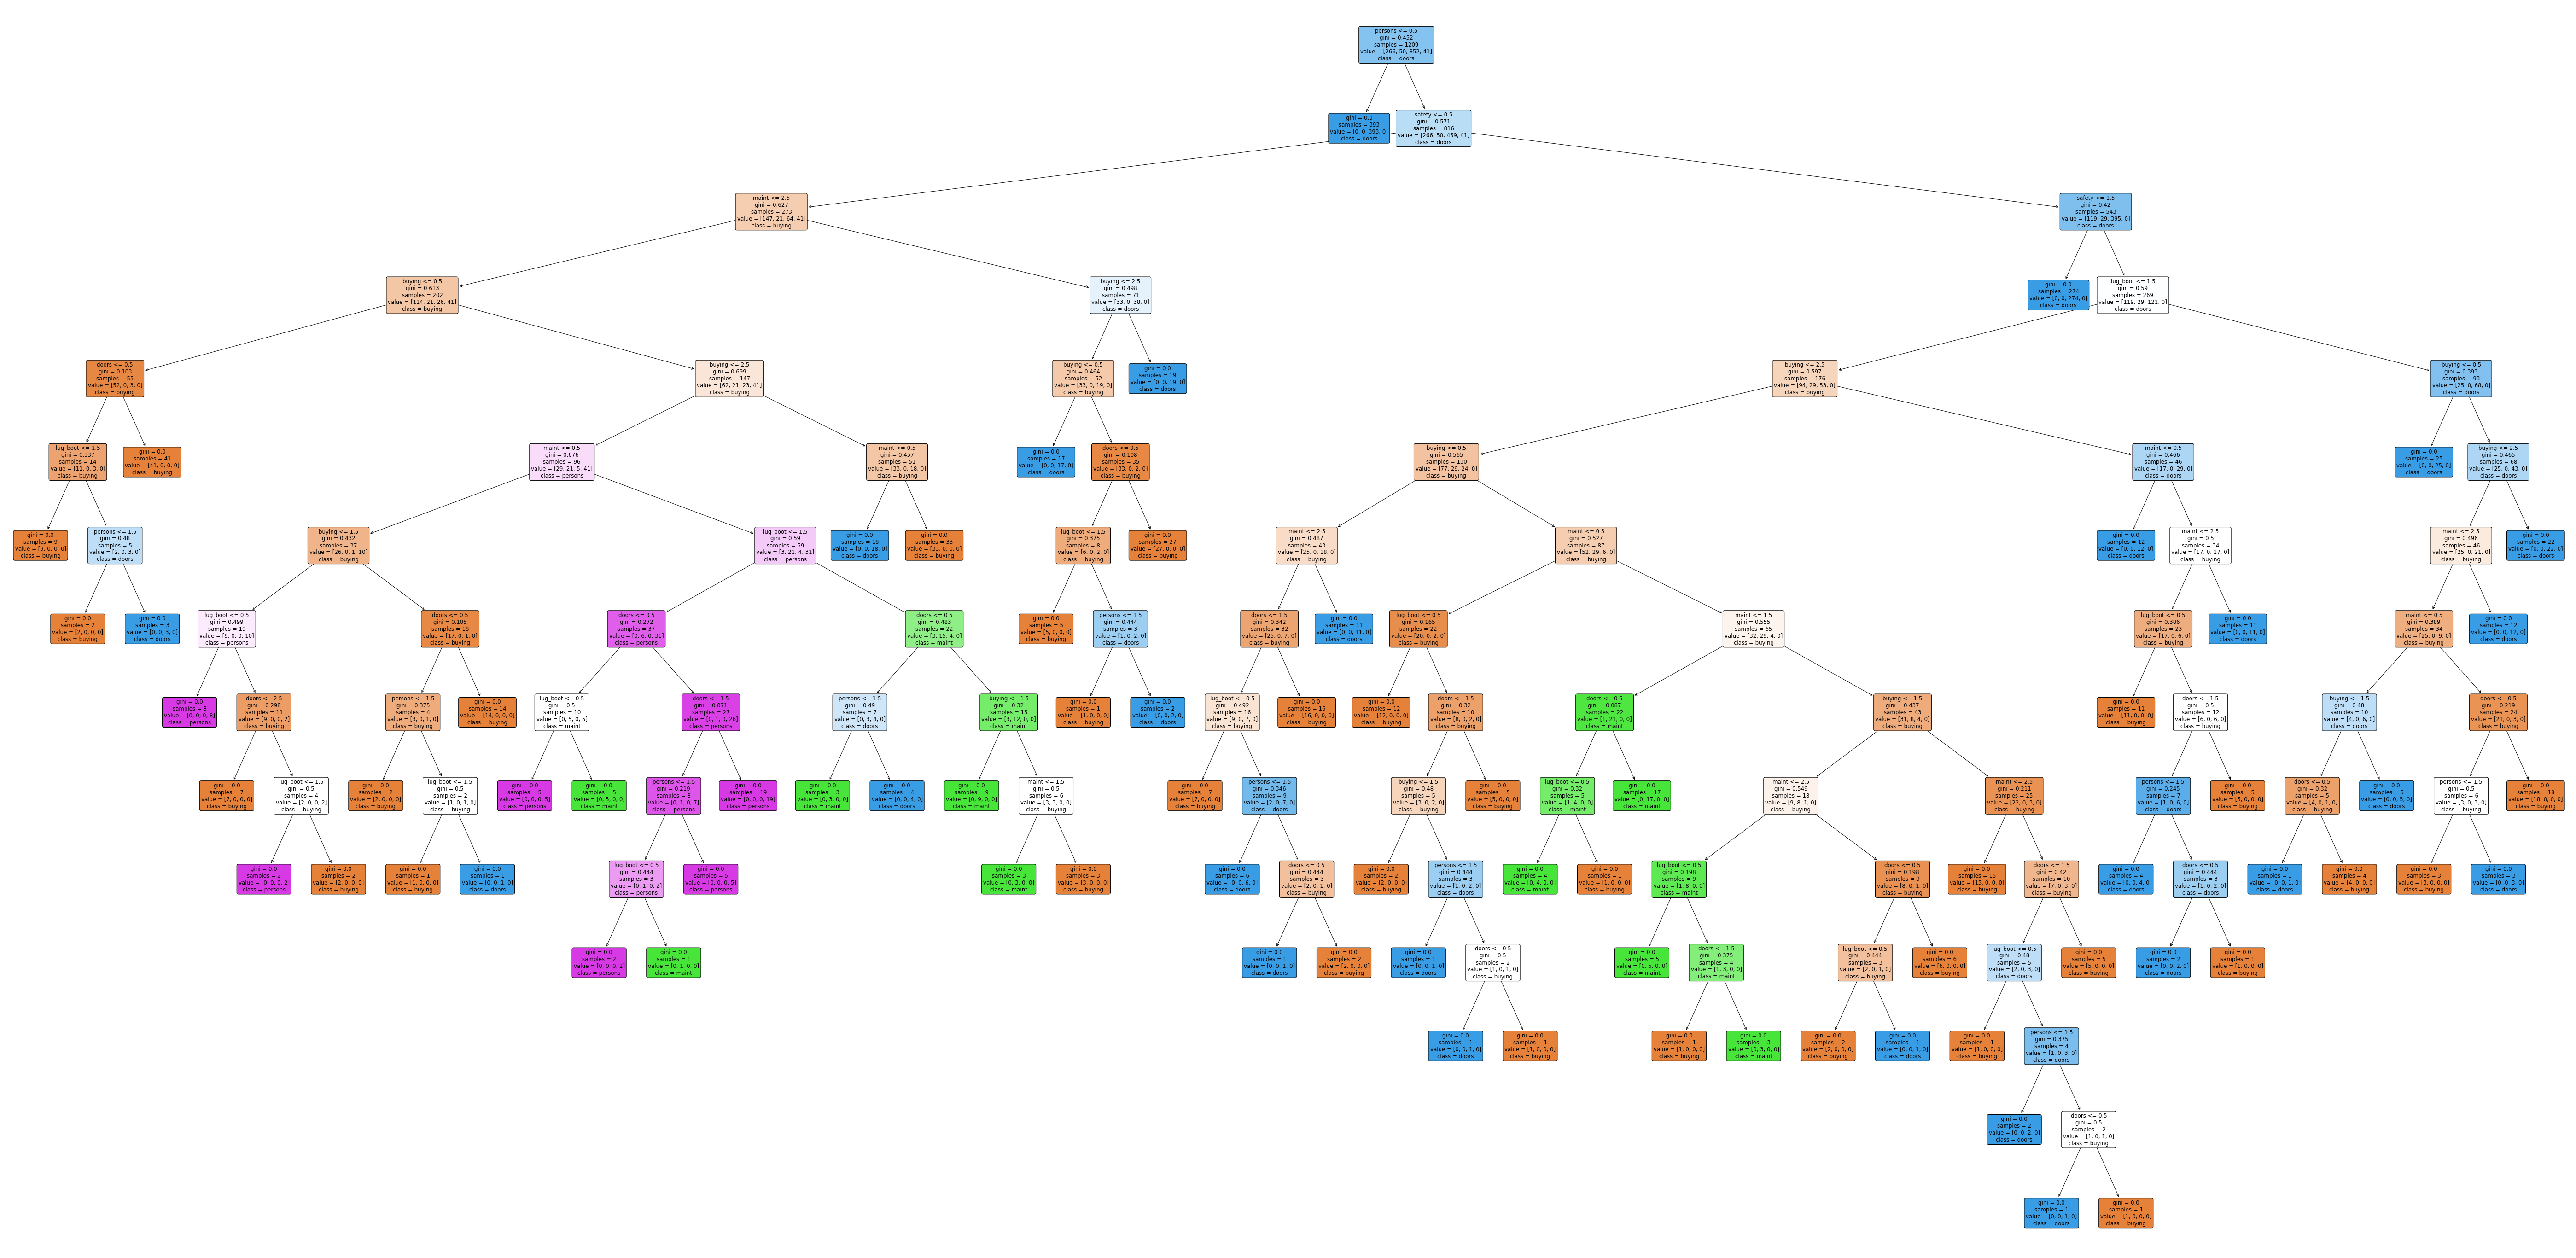

In [52]:
dt_clf1 = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=12)
dt_clf1 = dt_clf.fit(X_train, y_train)

plt.figure(figsize=(100, 50))
plot_tree(dt_clf1,
          filled=True,
          rounded=True,
          class_names=["buying", "maint", "doors", "persons", "lug_boot", "safety"],
         feature_names=X.columns)

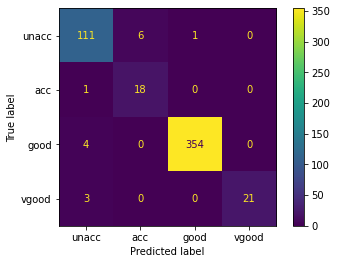

In [53]:

plot_confusion_matrix(dt_clf1, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [56]:
prediction = dt_clf1.predict(X_test)
accuracys = (prediction==y_test).sum()/(len(y_test))
accuracys

0.9710982658959537

In [57]:

print('Accuracy score with criterion entropy index: {0:0.4f}%'. format(accuracy_score(y_test,prediction)*100))

Accuracy score with criterion entropy index: 97.1098%
